<a href="https://colab.research.google.com/github/JonRitschard/CalculateRiskApp/blob/master/Stock_Predict_(Moving_Average).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance
import yfinance as yf

#Create an object to hold stock information
dataframe = yf.download("DIS", 
            "2010-01-01", 
            "2021-02-18", 
            auto_adjust=True)

#Only pull the date and close data
dataframe = dataframe[["Close"]]

#Drop any blank rows
dataframe = dataframe.dropna()

#print dataframe
dataframe

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,27.933924
2010-01-05,27.864237
2010-01-06,27.716166
2010-01-07,27.724878
2010-01-08,27.768419
...,...
2021-02-10,189.630005
2021-02-11,190.910004
2021-02-12,187.669998


Text(0.5, 1.0, 'Disney Stock Value 2010 to 2021')

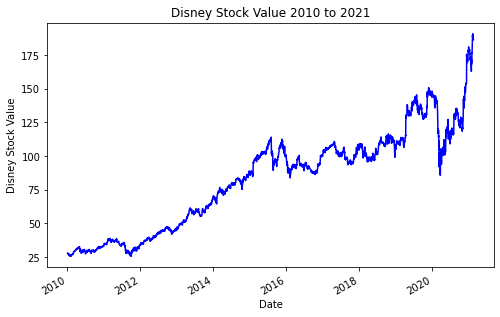

In [ ]:
import matplotlib.pyplot as pp

#plot the dataframe data
dataframe.Close.plot(figsize=(8,5),
                     color = "b")

#add label for y axis
pp.ylabel("Disney Stock Value")

#add title
pp.title("Disney Stock Value 2010 to 2021")

In [ ]:
#5 day moving average
dataframe["five_days_moving_average"] = dataframe["Close"].rolling(window=5).mean()

#20 day moving average
dataframe["twenty_days_moving_average"] = dataframe["Close"].rolling(window=20).mean()

#get price for next day
dataframe["value_next_day"] = dataframe["Close"].shift(-1)

#drop the NaNs (x)
dataframe = dataframe.dropna()

#assign explanatory variable (x) (independent variable)
x = dataframe[["five_days_moving_average", 
              "twenty_days_moving_average"]]

#drop the NaNs (y)
dataframe = dataframe.dropna()

#assign dependent variable (y)
y = dataframe["value_next_day"]

#print x and y for testing...
y

Date
2010-02-01     26.113466
2010-02-02     26.784159
2010-02-03     25.843452
2010-02-04     25.730217
2010-02-05     25.677956
                 ...    
2021-02-09    189.630005
2021-02-10    190.910004
2021-02-11    187.669998
2021-02-12    186.350006
2021-02-16    186.440002
Name: value_next_day, Length: 2780, dtype: float64

In [ ]:
#Split Data Set
split_index = 0.8
split_index = split_index * len(dataframe)

#Convert split_index to int
split_index = int(split_index)

#Training Data Sets
x_train = x[:split_index]
y_train = y[:split_index]

#Test Data Sets
x_test = x[split_index:]
y_test = y[split_index:]



In [ ]:
#Build Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(x_train,
                  y_train)

#Get Stock Price Using model
five_day_moving_average = model.coef_[0]
twenty_day_moving_average = model.coef_[1]

print(five_day_moving_average)
print(twenty_day_moving_average)

constant = model.intercept_

print(constant)

1.14145424124686
-0.14268497313990988
0.1637082405235617


Text(0, 0.5, 'Disney Stock Value')

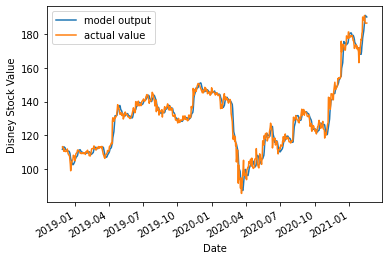

In [ ]:
test_output = model.predict(x_test)

import pandas
import matplotlib.pyplot as plt


"""
#make sure the rows are equal length
print(x_test)
print(y_test)

#if y is one larger than x: 
y_test = y[(split_index - 1):]
"""
test_output = pandas.DataFrame(test_output,
                               index = y_test.index,
                               columns = ["value"])

test_output.plot()
y_test.plot()

plt.legend(["model output",
               "actual value"])

plt.ylabel("Disney Stock Value")


In [ ]:
score = model.score(x[split_index:],
            y[split_index:])

score *= 100

print(score)

96.4850074602443


                 value  predicted_tomorrow  ...  strategy  strategy_returns
Date                                        ...                            
2018-11-29  114.315376          111.850457  ...         0         -0.000000
2018-11-30  113.217415          112.617876  ...         1          0.002165
2018-12-03  113.462486          113.327873  ...         1         -0.024797
2018-12-04  110.648979          113.115406  ...         0          0.000000
2018-12-06  112.080246          112.735930  ...         0         -0.000000
...                ...                 ...  ...       ...               ...
2021-02-09  188.210007          184.347707  ...         1          0.007545
2021-02-10  189.630005          187.263838  ...         1          0.006750
2021-02-11  190.910004          189.596470  ...         1         -0.016971
2021-02-12  187.669998          190.981051  ...         1         -0.007034
2021-02-16  186.350006          190.041419  ...         0               NaN

[556 rows x

Text(0, 0.5, 'Cumulative Returns')

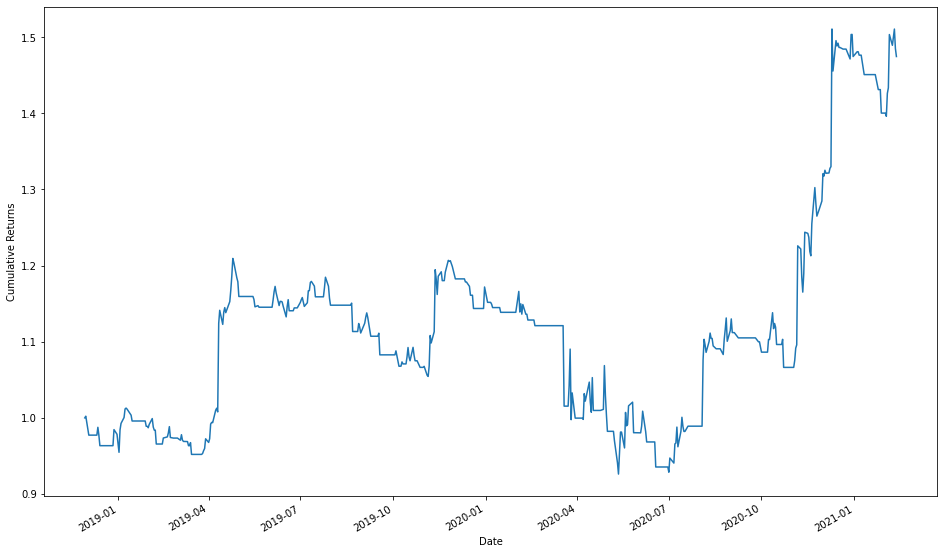

In [ ]:
stock = pandas.DataFrame()

stock["value"] = dataframe[split_index:]["Close"]

stock["predicted_tomorrow"] = test_output

stock["actual_tomorrow"] = y_test

stock["returns"] = stock["value"].pct_change().shift(-1)

import numpy

stock["strategy"] = numpy.where(stock.predicted_tomorrow.shift(1) < stock.predicted_tomorrow,
                                1,
                                0)

stock["strategy_returns"] = stock.strategy * stock["returns"]

cumulative_product = (stock["strategy_returns"] + 1).cumprod()

print(stock)
cumulative_product.plot(figsize = (16, 10))

plt.ylabel("Cumulative Returns")

In [ ]:
dataset = yf.download("DIS",
                            "2010-01-01",
                            "2021-02-18",
                            auto_adjust = True)
dataset["five_day_average"] = dataset["Close"].rolling(window=5).mean()
dataset["twenty_day_average"] = dataset["Close"].rolling(window=20).mean()

dataset = dataset.dropna()

dataset["predicted_stock_value"] = model.predict(dataset[["five_day_average",
                                                       "twenty_day_average"]])

dataset["strategy"] = numpy.where(dataset.predicted_stock_value.shift(1) < dataset.predicted_stock_value,
                                  "Buy",
                                  "Hold/Sell")


print(dataset)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...  predicted_stock_value   strategy
Date                                ...                                  
2010-02-01   25.782479   25.930555  ...              25.653528  Hold/Sell
2010-02-02   25.721504   26.139598  ...              25.730145        Buy
2010-02-03   26.061204   26.888683  ...              26.022202        Buy
2010-02-04   26.374781   26.557697  ...              26.099194        Buy
2010-02-05   25.808608   25.991525  ...              26.111436        Buy
...                ...         ...  ...                    ...        ...
2021-02-10  189.979996  190.699997  ...             187.263838        Buy
2021-02-11  189.179993  191.250000  ...             189.596470        Buy
2021-02-12  193.000000  193.850006  ...             190.981051        Buy
2021-02-16  187.300003  188.440002  ...             190.041419  Hold/Sell
2021-02-17  185.360001  187.630005  ...    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
